# Fake review classification

In [52]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [53]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [54]:
#loading dataset
df=pd.read_csv('/content/newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [55]:
df.shape

(1470, 35)

In [56]:
d = []
for i in range(1470):
    s = i+1
    d.append(s)

In [57]:
# setting an index value
df.insert(0, 'Index', d)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,No


In [58]:
df.shape

(1470, 36)

In [59]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

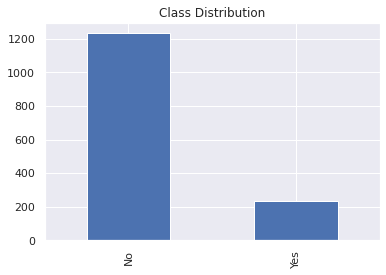

In [60]:
df['Attrition'].value_counts().plot(kind="bar")
plt.title("Class Distribution");

In [61]:
# shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1421,41,Travel_Rarely,642,Research & Development,1,3,Life Sciences,1,1999,...,80,1,12,3,3,5,3,1,0,No
1,572,26,Travel_Frequently,575,Research & Development,1,2,Life Sciences,1,792,...,80,1,5,2,3,2,2,2,0,No
2,723,38,Travel_Frequently,1391,Research & Development,10,1,Medical,1,1006,...,80,1,3,0,2,2,1,0,2,No
3,1229,41,Non-Travel,552,Human Resources,4,3,Human Resources,1,1722,...,80,1,10,4,3,3,2,1,2,No
4,566,23,Travel_Rarely,310,Research & Development,10,1,Medical,1,784,...,80,0,2,3,3,2,2,0,2,No


In [62]:
df.isnull().sum()

Index                       0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa72a7a1850>,
      dtype=object)

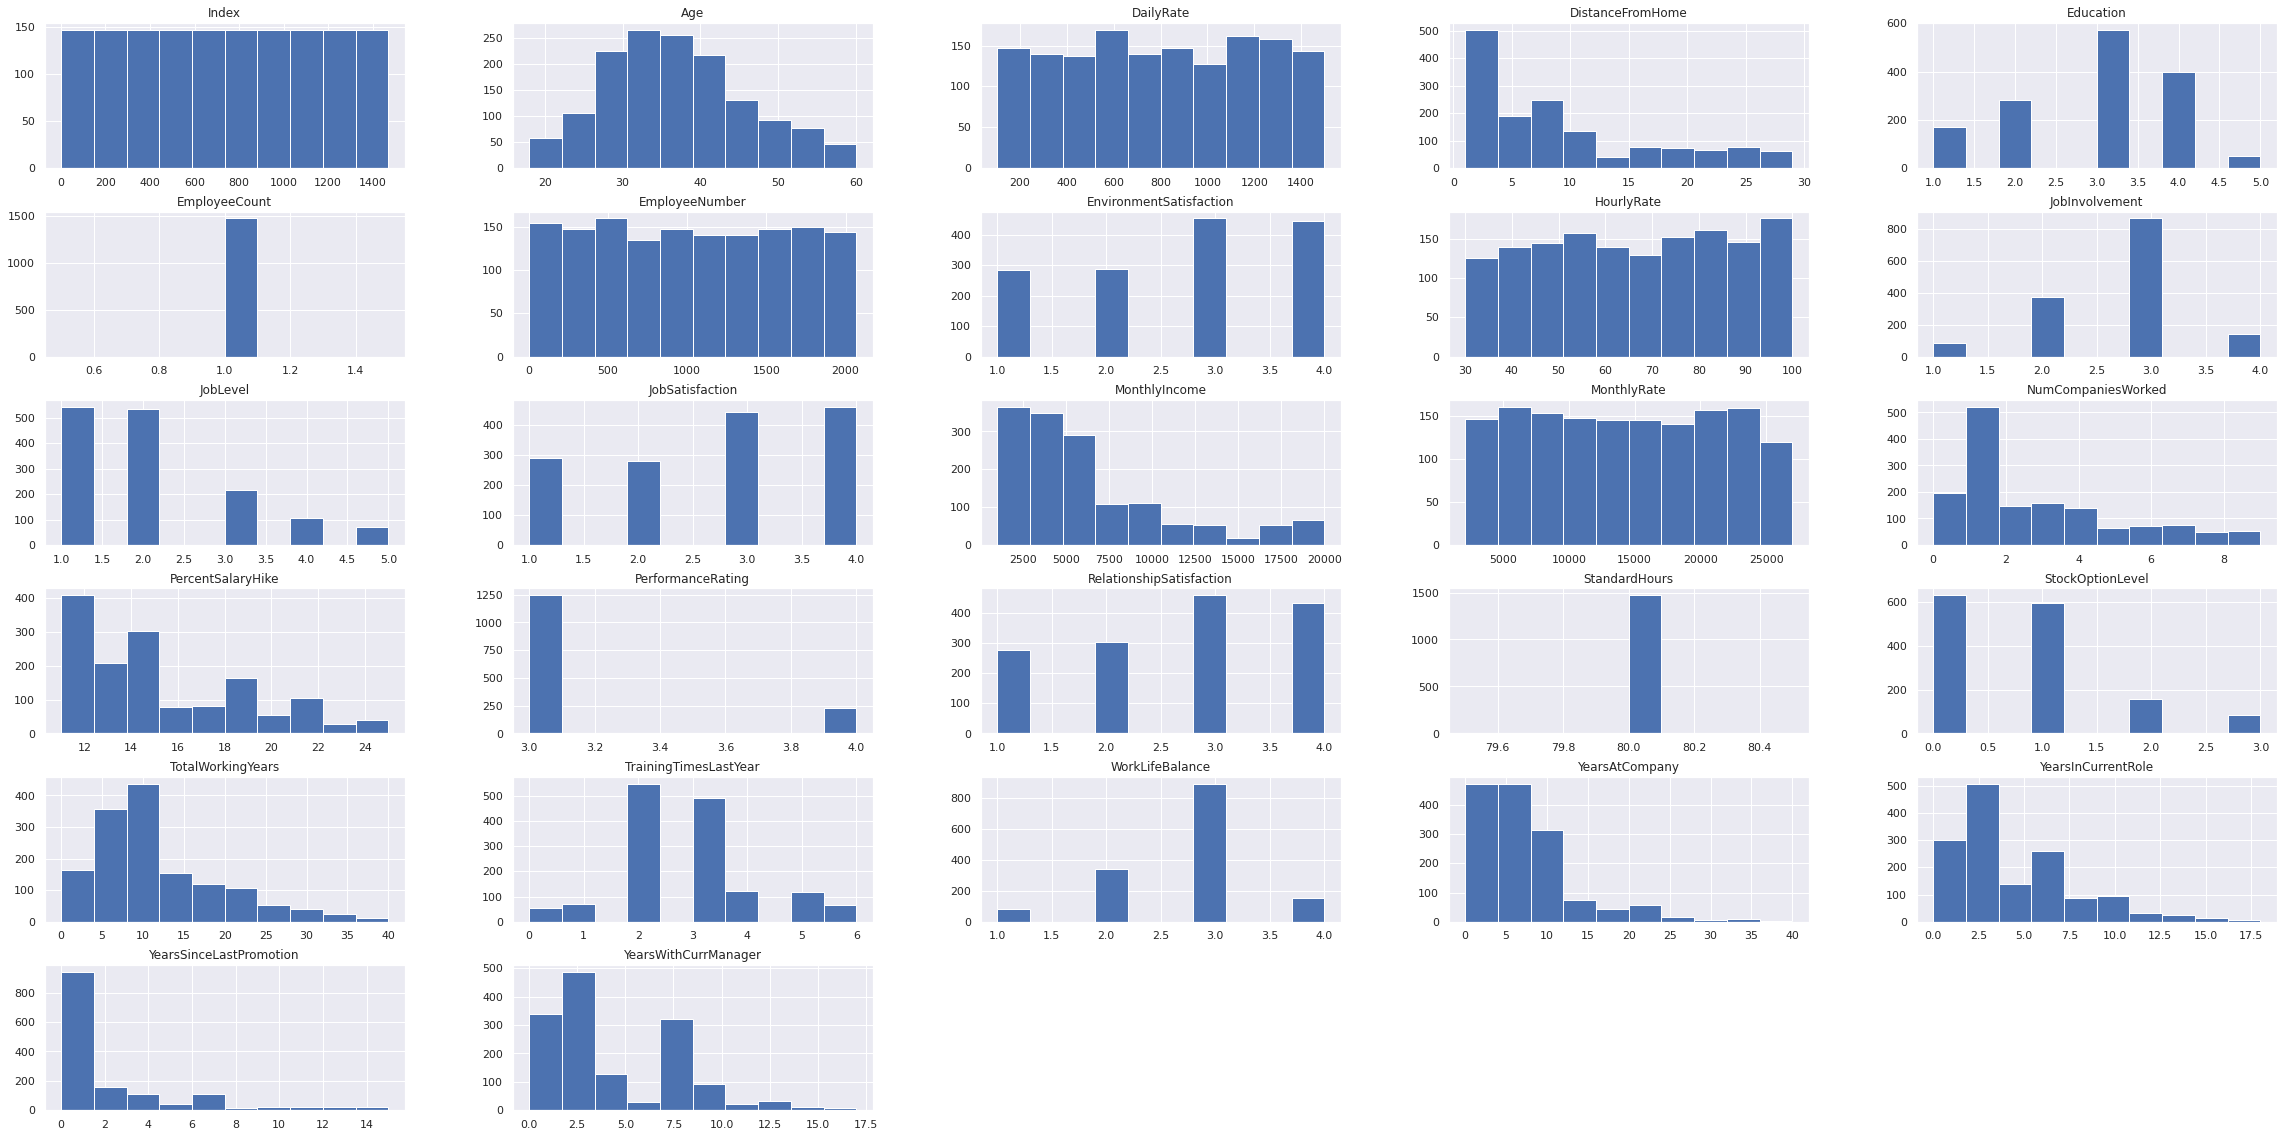

In [63]:
df.hist(figsize=(40,20))

In [64]:
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1421,41,Travel_Rarely,642,Research & Development,1,3,Life Sciences,1,1999,...,80,1,12,3,3,5,3,1,0,No
1,572,26,Travel_Frequently,575,Research & Development,1,2,Life Sciences,1,792,...,80,1,5,2,3,2,2,2,0,No
2,723,38,Travel_Frequently,1391,Research & Development,10,1,Medical,1,1006,...,80,1,3,0,2,2,1,0,2,No
3,1229,41,Non-Travel,552,Human Resources,4,3,Human Resources,1,1722,...,80,1,10,4,3,3,2,1,2,No
4,566,23,Travel_Rarely,310,Research & Development,10,1,Medical,1,784,...,80,0,2,3,3,2,2,0,2,No


In [65]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Attrition']

In [66]:
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["Over18"] = LabelEncoder().fit_transform(df['Over18'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

In [67]:
df1 = df.sort_values(by=['Index'], ascending=True)
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
295,1,41,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,1
151,2,49,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,0
183,3,37,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
318,4,33,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,0
1355,5,27,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,0


In [68]:
df1.reset_index(drop=True, inplace=True)

In [69]:
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,1
1,2,49,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,0
2,3,37,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
3,4,33,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,0
4,5,27,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,0


In [70]:
df1.reset_index(drop=True, inplace=True)

In [71]:
x = df1.drop(['Index', 'Attrition'], axis = 1)
y = df1['Attrition']

In [72]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


## 10 - fold cross validation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns

### CROSS VALIDATION

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [76]:
from sklearn.svm import LinearSVC
models = LinearSVC()
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    models.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(models.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Accuracy:  0.5047619047619047
              precision    recall  f1-score   support

           0       0.85      0.49      0.63      1233
           1       0.17      0.56      0.27       237

    accuracy                           0.50      1470
   macro avg       0.51      0.53      0.45      1470
weighted avg       0.74      0.50      0.57      1470

Confusion matrix:  [[610 623]
 [105 132]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [77]:
from sklearn.linear_model import PassiveAggressiveClassifier
pag=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    pag.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(pag.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.4217687074829932
              precision    recall  f1-score   support

           0       0.84      0.39      0.53      1233
           1       0.16      0.61      0.25       237

    accuracy                           0.42      1470
   macro avg       0.50      0.50      0.39      1470
weighted avg       0.73      0.42      0.48      1470

Confusion matrix:  [[476 757]
 [ 93 144]]


In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    lr.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.7884353741496599
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1233
           1       0.39      0.57      0.46       237

    accuracy                           0.79      1470
   macro avg       0.65      0.70      0.67      1470
weighted avg       0.83      0.79      0.80      1470

Confusion matrix:  [[1024  209]
 [ 102  135]]


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    rf.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(rf.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8394557823129252
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1233
           1       0.50      0.35      0.41       237

    accuracy                           0.84      1470
   macro avg       0.69      0.64      0.66      1470
weighted avg       0.82      0.84      0.83      1470

Confusion matrix:  [[1152   81]
 [ 155   82]]


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    gb.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(gb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8285714285714286
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1233
           1       0.46      0.40      0.43       237

    accuracy                           0.83      1470
   macro avg       0.68      0.66      0.66      1470
weighted avg       0.82      0.83      0.82      1470

Confusion matrix:  [[1123  110]
 [ 142   95]]


In [81]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=400, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    xgbc.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(xgbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8394557823129252
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1233
           1       0.50      0.43      0.46       237

    accuracy                           0.84      1470
   macro avg       0.70      0.67      0.68      1470
weighted avg       0.83      0.84      0.83      1470

Confusion matrix:  [[1133  100]
 [ 136  101]]


In [82]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)
    lgb.fit(X_train_oversampled, y_train_oversampled)
    # store result from classification
    y_pred.extend(lgb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8496598639455782
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1233
           1       0.55      0.36      0.44       237

    accuracy                           0.85      1470
   macro avg       0.72      0.65      0.68      1470
weighted avg       0.83      0.85      0.84      1470

Confusion matrix:  [[1163   70]
 [ 151   86]]


### Baseline models

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Handling imbalanced data using smotomek

In [92]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1233, 1: 237})
Resample dataset shape Counter({0: 986, 1: 986})


In [93]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_smote, y_smote)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[208  39]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       247
           1       0.13      0.13      0.13        47

    accuracy                           0.73       294
   macro avg       0.48      0.48      0.48       294
weighted avg       0.72      0.73      0.73       294

accuracy_score:  0.7278911564625851


In [94]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_smote, y_smote)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[240   7]
 [ 45   2]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       247
           1       0.22      0.04      0.07        47

    accuracy                           0.82       294
   macro avg       0.53      0.51      0.49       294
weighted avg       0.74      0.82      0.77       294

accuracy_score:  0.8231292517006803


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [95]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_smote, y_smote)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[220  27]
 [ 32  15]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.36      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294

accuracy_score:  0.7993197278911565


In [96]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_smote, y_smote)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[229  18]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.50      0.38      0.43        47

    accuracy                           0.84       294
   macro avg       0.69      0.66      0.67       294
weighted avg       0.83      0.84      0.83       294

accuracy_score:  0.8401360544217688


In [97]:
log = LogisticRegression(max_iter=10000) 
log.fit(x_smote, y_smote)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[208  39]
 [ 23  24]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       247
           1       0.38      0.51      0.44        47

    accuracy                           0.79       294
   macro avg       0.64      0.68      0.65       294
weighted avg       0.82      0.79      0.80       294

accuracy_score:  0.7891156462585034


In [98]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(x_smote, y_smote)
y_pred=lgb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[231  16]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.50      0.34      0.41        47

    accuracy                           0.84       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.82      0.84      0.83       294

accuracy_score:  0.8401360544217688


In [99]:
gb = GradientBoostingClassifier(n_estimators=300)
gb.fit(x_smote, y_smote)
y_pred=gb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[216  31]
 [ 28  19]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       247
           1       0.38      0.40      0.39        47

    accuracy                           0.80       294
   macro avg       0.63      0.64      0.64       294
weighted avg       0.80      0.80      0.80       294

accuracy_score:  0.7993197278911565
